In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('loan_data.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
data.dropna(inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


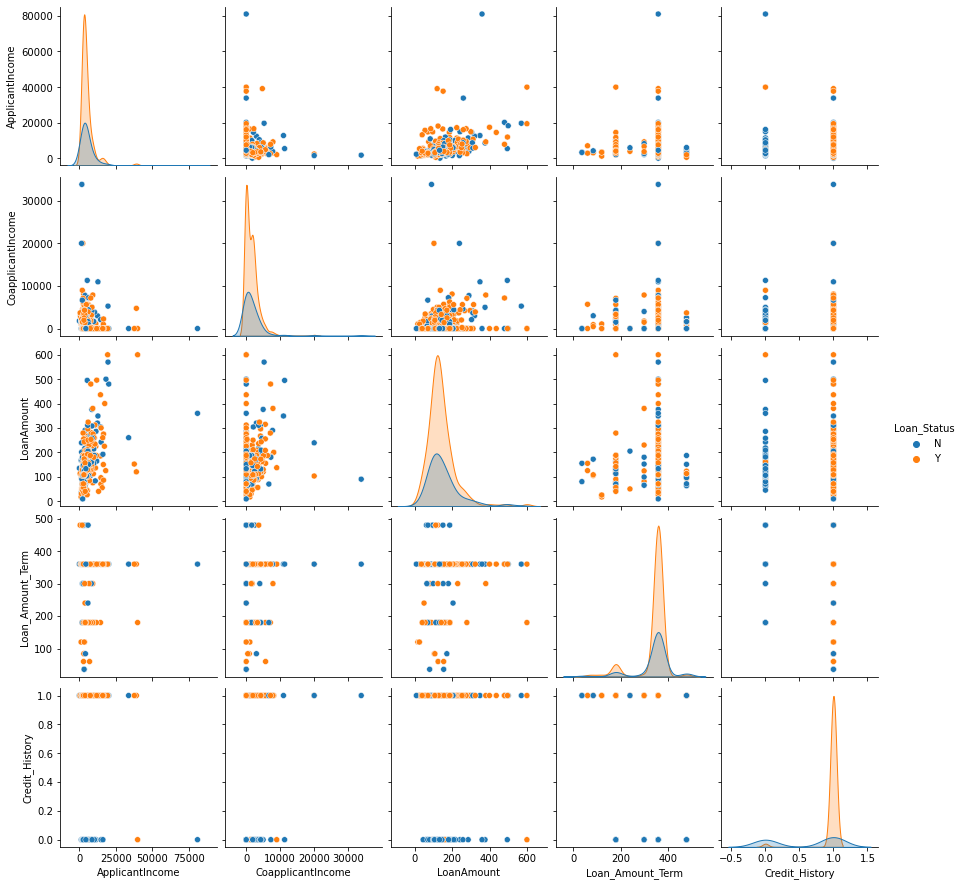

In [30]:
import seaborn as sns
sns.pairplot(data,hue='Loan_Status')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

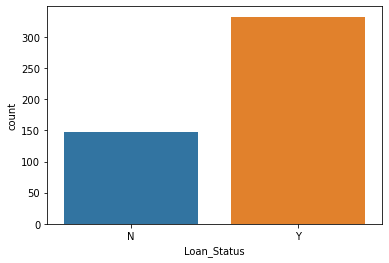

In [31]:
sns.countplot(x='Loan_Status',data = data)

In [32]:
x = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']]

In [33]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
1,4583,1508.0,128.0,1.0
2,3000,0.0,66.0,1.0
3,2583,2358.0,120.0,1.0
4,6000,0.0,141.0,1.0
5,5417,4196.0,267.0,1.0


In [34]:
y = data['Loan_Status']

In [35]:
y.head()

1    N
2    Y
3    Y
4    Y
5    Y
Name: Loan_Status, dtype: object

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [37]:
x_train.shape


(384, 4)

In [38]:
x_test.shape

(96, 4)

In [39]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [40]:
pred = nb.predict(x_test)
pred

array(['Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y'], dtype='<U1')

In [41]:
y_test

193    Y
580    Y
138    N
476    Y
504    Y
      ..
474    Y
161    N
252    Y
1      N
6      Y
Name: Loan_Status, Length: 96, dtype: object

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7916666666666666

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[14, 12],
       [ 8, 62]], dtype=int64)

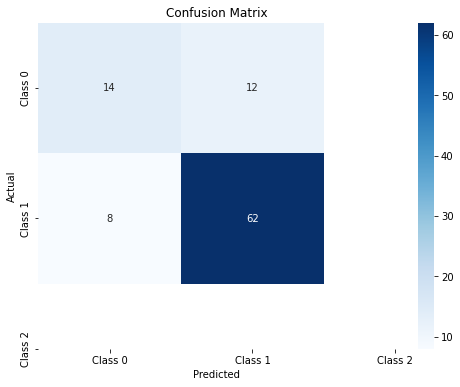

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, pred)

class_names = ['Class 0', 'Class 1', 'Class 2'] 

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()